<a href="https://colab.research.google.com/github/nanutnutna/data_practice/blob/master/web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from urllib.request import urlopen

In [0]:
url = 'https://www.settrade.com/C04_08_stock_sectorcomparison_p1.jsp?txtSymbol=KCAR'
data =  urlopen(url)
page_html = data.read()

In [9]:
pip install beautifulsoup4

In [10]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page_html,'html.parser')
soup


<!DOCTYPE html>

<html lang="th">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" id="viewport" name="viewport">
<meta content="SETTRADE.COM - Leading Technology for Professional Investors" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="" property="og:url"/>
<meta content="https://www.settrade.com/images/share/logo_in_fb.gif" property="og:image"/>
<meta content="" property="og:site_name"/>
<meta content="" property="fb:admins"/>
<meta content="" property="og:description"/>
<link href="/style/style.css" rel="stylesheet" type="text/css"/>
<link href="/style/stt-style.css" rel="stylesheet" type="text/css"/>
<link href="/script/owl-carousel/owl.carousel.css" rel="stylesheet" type="text/css"/>
<link href="/script/owl-carousel/owl.theme.css" rel="stylesheet" type="text/css"/>
<link href="/script/owl-carousel/owl.transitions.css" rel="stylesheet" type="text/css"/>
<link href="/images/favicon.ico" rel="shortcut icon" type

In [0]:
company_name = soup.find_all('td',{'class':'text-left'})

In [0]:
stock_name = [company_name[i].string for i in range(len(company_name))]

In [13]:
stock_table = soup.find_all('table', {'class':'table table-info'})
stock_table

[<table class="table table-info">
 <thead>
 <tr>
 <th>ลำดับที่</th>
 <th>หลักทรัพย์</th>
 <th>สูงสุด</th>
 <th>ต่ำสุด</th>
 <th>ปิด</th>
 <th>เปลี่ยนแปลง</th>
 <th>%เปลี่ยนแปลง</th>
 <th>ปริมาณ</th>
 <th>มูลค่า(ล้านบาท)</th>
 </tr>
 </thead>
 <tbody>
 <tr class="">
 <td>1</td>
 <td class="text-left">PE</td>
 <td>-</td>
 <td>-</td>
 <td>-</td>
 <td class="colorRed">-</td>
 <td class="colorRed">-</td>
 <td>-</td>
 <td>-</td>
 </tr>
 <tr class="">
 <td>2</td>
 <td class="text-left">GBX</td>
 <td>0.42</td>
 <td>0.41</td>
 <td>0.41</td>
 <td class="colorRed">-0.01</td>
 <td class="colorRed">-2.38</td>
 <td>8,200</td>
 <td>0.00</td>
 </tr>
 <tr class="">
 <td>3</td>
 <td class="text-left">FSS</td>
 <td>1.14</td>
 <td>1.07</td>
 <td>1.08</td>
 <td class="colorRed">-0.02</td>
 <td class="colorRed">-1.82</td>
 <td>100,300</td>
 <td>0.11</td>
 </tr>
 <tr class="">
 <td>4</td>
 <td class="text-left">MBKET</td>
 <td>6.55</td>
 <td>6.50</td>
 <td>6.55</td>
 <td class="colorRed">-0.10</td>
 <td clas

In [14]:
table = soup.find_all('th')
table

[<th>ลำดับที่</th>,
 <th>หลักทรัพย์</th>,
 <th>สูงสุด</th>,
 <th>ต่ำสุด</th>,
 <th>ปิด</th>,
 <th>เปลี่ยนแปลง</th>,
 <th>%เปลี่ยนแปลง</th>,
 <th>ปริมาณ</th>,
 <th>มูลค่า(ล้านบาท)</th>,
 <th>Symbol</th>,
 <th>Last</th>,
 <th>Chg</th>,
 <th class="align-icon"><a href="http://www.facebook.com/settradeclub/" target="_blank"><img src="/images/bullet/facebook-icon.png" style="width: 24px;"/></a></th>,
 <th class="align-icon"><a href="https://www.set.or.th/th/LINE.html" target="_blank"><img src="/images/bullet/line-icon.png" style="width: 35px;"/></a></th>,
 <th class="align-icon"><a href="http://www.youtube.com/user/setgroupofficial" target="_blank"><img src="/images/bullet/youtube-icon.png" style="width: 35px;"/></a></th>,
 <th class="align-icon"><a href="/C00_Redirect.jsp?txtPage=other/th/rss.html" target="_blank"><img src="/images/bullet/rss-icon.png" style="width: 32px;"/></a></th>]

In [15]:
header = [table[i].string for i in range(9)]
header

['ลำดับที่',
 'หลักทรัพย์',
 'สูงสุด',
 'ต่ำสุด',
 'ปิด',
 'เปลี่ยนแปลง',
 '%เปลี่ยนแปลง',
 'ปริมาณ',
 'มูลค่า(ล้านบาท)']

In [0]:
test = soup.find_all('td')
use = len(test)-9

In [0]:
all_index = [test[i].string for i in range(use)]

In [0]:
"""'ลำดับที่ 0 ','หลักทรัพย์ 1','ปริมาณ',สูงสุด','ต่ำสุด','"""
index_num = [all_index[i] for i in range(0,len(all_index),9)]
name = [all_index[i] for i in range(1,len(all_index),9)]
delta = [all_index[i] for i in range(7,len(all_index),9)]
max_sell = [all_index[i] for i in range(2,len(all_index),9)]
min_sell = [all_index[i] for i in range(3,len(all_index),9)]


In [0]:
for_df = {header[1]:name,header[7]:delta,header[2]:max_sell,header[3]:min_sell}

In [48]:
print(name,end='')

['PE', 'GBX', 'FSS', 'MBKET', 'ASP', 'ASAP', 'KCAR', 'TNITY', 'ZMICO', 'AEC', 'ML', 'GL', 'CGH', 'S11', 'AEONTS', 'SAWAD', 'FNS', 'JMT', 'UOBKH', 'KTC', 'MFC', 'THANI', 'ECL', 'MTC', 'IFS', 'TK', 'PL', 'KGI', 'ASK', 'BAM', 'BFIT', 'AMANAH']

In [60]:
#แสดงข้อมูลที่ได้จากการทำ web scraping
import pandas as pd
df = pd.DataFrame(for_df)
df

,หลักทรัพย์,ปริมาณ,สูงสุด,ต่ำสุด
0,PE,-,-,-
1,GBX,"8,200",0.42,0.41
2,FSS,"100,300",1.14,1.07
3,MBKET,"244,000",6.55,6.50
4,ASP,"2,643,450",1.52,1.48
5,ASAP,"2,890,169",1.20,1.15
6,KCAR,"80,800",8.00,7.90
7,TNITY,"79,102",3.56,3.48
8,ZMICO,"348,650",0.56,0.55
9,AEC,"582,200",0.22,0.20


<BarContainer object of 10 artists>

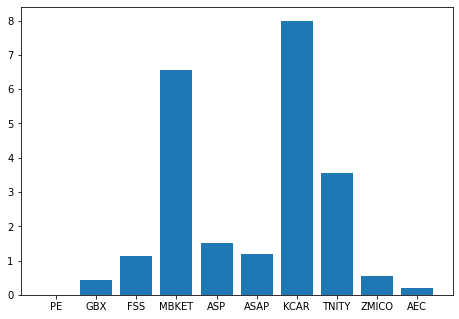

In [64]:
#แสดงตัวอย่างราคาซื้อสูงสุดของบริษัทในตาราง
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
max_sell_1 = [0,0.42,1.14,6.55,1.52,1.20,8.00,3.56,0.56,0.2]
ax.bar(name[0:10],max_sell_1)